<a href="https://colab.research.google.com/github/rahiakela/mathematics-for-machine-learning/blob/main/deep-learning-book-maths/2_7_eigen_decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##2.7 Eigendecomposition

We will see some major concepts of linear algebra in this chapter. It is also quite heavy so hang on! We will start with getting some ideas on eigenvectors and eigenvalues. We will develop on the idea that a matrix can be seen as a linear transformation and that applying a matrix on its eigenvectors gives new vectors with the same direction. Then we will see how to express quadratic equations into the matrix form. 

We will see that the eigendecomposition of the matrix corresponding to a quadratic equation can be used to find the minimum and maximum of this function. As a bonus, we will also see how to visualize linear transformations in Python!

The eigendecomposition is one form of matrix decomposition. Decomposing a matrix means that we want to find a product of matrices that is equal to the initial matrix. 

In the case of the eigendecomposition, we decompose the initial matrix into the product of its eigenvectors and eigenvalues. Before all, let's see what are eigenvectors and eigenvalues.

<img src="https://github.com/rahiakela/mathematics-for-machine-learning/blob/main/deep-learning-book-maths/images/unit-circle-eigenvectors.png?raw=1" width="400">

##Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Plot parameters
sns.set()
%pylab inline
pylab.rcParams['figure.figsize'] = (4, 4)
plt.rcParams['xtick.major.size'] = 0
plt.rcParams['ytick.major.size'] = 0
# Avoid inaccurate floating values (for inverse matrices in dot product for instance)
# See https://stackoverflow.com/questions/24537791/numpy-matrix-inversion-rounding-errors
np.set_printoptions(suppress=True)

Populating the interactive namespace from numpy and matplotlib


In [3]:
def plot_vectors(vecs, cols, alpha=1):
  """
  Plot set of vectors.

  Parameters
  ----------
  vecs : array-like
      Coordinates of the vectors to plot. Each vectors is in an array. For
      instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
  cols : array-like
      Colors of the vectors. For instance: ['red', 'blue'] will display the
      first vector in red and the second in blue.
  alpha : float
      Opacity of vectors

  Returns:

  fig : instance of matplotlib.figure.Figure
      The figure of the vectors
  """
  plt.axvline(x=0, color='#A9A9A9', zorder=0)
  plt.axhline(y=0, color='#A9A9A9', zorder=0)

  for i in range(len(vecs)):
      if (isinstance(alpha, list)):
          alpha_i = alpha[i]
      else:
          alpha_i = alpha
      x = np.concatenate([[0,0],vecs[i]])
      plt.quiver([x[0]],
                  [x[1]],
                  [x[2]],
                  [x[3]],
                  angles='xy', scale_units='xy', scale=1, color=cols[i],
                alpha=alpha_i)

## Matrices as linear transformations

As we have seen in [2.3](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.3-Identity-and-Inverse-Matrices/) with the example of the identity matrix, you can think of matrices as linear transformations. Some matrices will rotate your space, others will rescale it etc. So when we apply a matrix to a vector, we end up with a transformed version of the vector. When we say that we 'apply' the matrix to the vector it means that we calculate the dot product of the matrix with the vector. We will start with a basic example of this kind of transformation.

### Example 1.

In [4]:
A = np.array([
   [-1, 3],
   [2, -2]           
])
A

array([[-1,  3],
       [ 2, -2]])

In [5]:
v = np.array([
  [2],
  [1]            
])
v

array([[2],
       [1]])

Let's plot this vector.

(-1.0, 4.0)

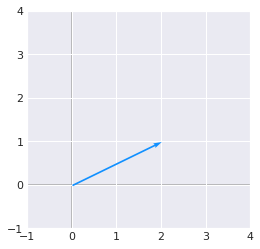

In [6]:
plot_vectors([v.flatten()], cols=["#1190FF"])
plt.ylim(-1, 4)
plt.xlim(-1, 4)

Now, we will apply the matrix ${A}$ to this vector and plot the old vector (light blue) and the new one (orange).

[[1]
 [2]]


(-1.0, 4.0)

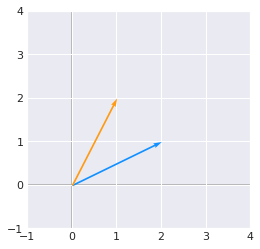

In [7]:
Av = A.dot(v)
print(Av)

plot_vectors([v.flatten(), Av.flatten()], cols=["#1190FF", "#FF9A13"])
plt.ylim(-1, 4)
plt.xlim(-1, 4)

We can see that applying the matrix ${A}$ has the effect of modifying the vector.

Now that you can think of matrices as linear transformation recipes.

Let's see the case of a very special type of vector: the eigenvector.

##Eigenvectors and eigenvalues

We have seen an example of a vector transformed by a matrix. Now imagine that the transformation of the initial vector gives us a new vector that has the exact same direction. The scale can be different but the direction is the same. Applying the matrix didn't change the direction of the vector. This special vector is called an eigenvector of the matrix. We will see that finding the eigenvectors of a matrix can be very useful.

> Imagine that the transformation of the initial vector by the matrix gives a new vector with the exact same direction. This vector is called an eigenvector of ${A}$.


This means that ${v}$ is a eigenvector of ${A}$ if ${v}$ and ${Av}$ are in the same direction or to rephrase it if the vectors ${Av}$ and ${v}$ are parallel. The output vector is just a scaled version of the input vector. This scalling factor is $\lambda$ which is called the **eigenvalue** of ${A}$.

$$
{Av} = \lambda {v}
$$

### Example 3.

The diagonal matrix can be denoted $diag({v})$ where ${v}$ is the vector containing the diagonal values.

$$
{D}=
\begin{bmatrix}
    2 & 0 & 0 & 0\\\\
    0 & 4 & 0 & 0\\\\
    0 & 0 & 3 & 0\\\\
    0 & 0 & 0 & 1
\end{bmatrix}
$$

In this matrix, ${v}$ is the following vector:

$$
{v}=
\begin{bmatrix}
    2\\\\
    4\\\\
    3\\\\
    1
\end{bmatrix}
$$

The Numpy function `diag()` can be used to create square diagonal matrices:

In [ ]:
# create square diagonal matrice
v = np.array([2, 4, 3, 1])
D = np.diag(v)
D

array([[2, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 1]])

In [ ]:
# create the vector containing the diagonal values
v = np.diag(D)
v

array([2, 4, 3, 1])

### Example 4.

The mutliplication between a diagonal matrix and a vector is thus just a ponderation of each element of the vector by $v$:

$$
{D}=
\begin{bmatrix}
    2 & 0 & 0 & 0\\\\
    0 & 4 & 0 & 0\\\\
    0 & 0 & 3 & 0\\\\
    0 & 0 & 0 & 1
\end{bmatrix}
$$

and

$$
{x}=
\begin{bmatrix}
    3\\\\
    2\\\\
    2\\\\
    7
\end{bmatrix}
$$

$$
\begin{align*}
&{Dx}=
\begin{bmatrix}
    2 & 0 & 0 & 0\\\\
    0 & 4 & 0 & 0\\\\
    0 & 0 & 3 & 0\\\\
    0 & 0 & 0 & 1
\end{bmatrix} \times
\begin{bmatrix}
    3\\\\
    2\\\\
    2\\\\
    7
\end{bmatrix}\\\\
&=\begin{bmatrix}
    2\times3 + 0\times2 + 0\times2 + 0\times7\\\\
    0\times3 + 4\times2 + 0\times2 + 0\times7\\\\
    0\times3 + 0\times2 + 3\times2 + 0\times7\\\\
    0\times3 + 0\times2 + 0\times2 + 1\times7
\end{bmatrix}\\\\
&=
\begin{bmatrix}
    2\times3\\\\
    4\times2\\\\
    3\times2\\\\
    1\times7
\end{bmatrix}
\end{align*}
$$

In [ ]:
# create square diagonal matrice
v = np.array([2, 4, 3, 1])
D = np.diag(v)
D

array([[2, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 1]])

In [ ]:
x = np.array([3, 2, 2, 7])

# get Dx by dot product becoz we have to do here matrix-vector mutliplication
Dx = np.dot(D, x)
Dx

array([6, 8, 6, 7])

### Example 5.

Non square matrices have the same properties:

$$
{D}=
\begin{bmatrix}
    2 & 0 & 0\\\\
    0 & 4 & 0\\\\
    0 & 0 & 3\\\\
    0 & 0 & 0
\end{bmatrix}
$$

and

$$
{x}=
\begin{bmatrix}
    3\\\\
    2\\\\
    2
\end{bmatrix}
$$

$$
{Dx}=
\begin{bmatrix}
    2 & 0 & 0\\\\
    0 & 4 & 0\\\\
    0 & 0 & 3\\\\
    0 & 0 & 0
\end{bmatrix}
\times
\begin{bmatrix}
    3\\\\
    2\\\\
    2
\end{bmatrix}
=
\begin{bmatrix}
    2\times3\\\\
    4\times2\\\\
    3\times2\\\\
    0
\end{bmatrix}
$$

In [ ]:
D = np.array([
  [2, 0, 0],
  [0, 4, 0],
  [0, 0, 3],
  [0, 0, 0]
])

x = np.array([3, 2, 2])
Dx = np.dot(D, x)
Dx

array([6, 8, 6, 0])

The invert of a square diagonal matrix exists if all entries of the diagonal are non-zeros. If it is the case, the invert is easy to find. Also, the inverse doen't exist if the matrix is non-square.

$$
{D}=
\begin{bmatrix}
    2 & 0 & 0 & 0\\\\
    0 & 4 & 0 & 0\\\\
    0 & 0 & 3 & 0\\\\
    0 & 0 & 0 & 1
\end{bmatrix}
$$

$$
{D}^{-1}=
\begin{bmatrix}
    \frac{1}{2} & 0 & 0 & 0\\\\
    0 & \frac{1}{4} & 0 & 0\\\\
    0 & 0 & \frac{1}{3} & 0\\\\
    0 & 0 & 0 & \frac{1}{1}
\end{bmatrix}
$$

$$
{D}=
\begin{bmatrix}
    2 & 0 & 0 & 0\\\\
    0 & 4 & 0 & 0\\\\
    0 & 0 & 3 & 0\\\\
    0 & 0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
    \frac{1}{2} & 0 & 0 & 0\\\\
    0 & \frac{1}{4} & 0 & 0\\\\
    0 & 0 & \frac{1}{3} & 0\\\\
    0 & 0 & 0 & \frac{1}{1}
\end{bmatrix}=
\begin{bmatrix}
    1 & 0 & 0 & 0\\\\
    0 & 1 & 0 & 0\\\\
    0 & 0 & 1 & 0\\\\
    0 & 0 & 0 & 1
\end{bmatrix}
$$

Let's check with Numpy that the multiplication of the matrix with its invert gives us the identity matrix:

In [ ]:
A = np.array([
   [2, 0, 0, 0], 
   [0, 4, 0, 0], 
   [0, 0, 3, 0], 
   [0, 0, 0, 1]           
])
A

array([[2, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 1]])

In [ ]:
A_inv = np.linalg.inv(A)
A_inv

array([[0.5       , 0.        , 0.        , 0.        ],
       [0.        , 0.25      , 0.        , 0.        ],
       [0.        , 0.        , 0.33333333, 0.        ],
       [0.        , 0.        , 0.        , 1.        ]])

In [ ]:
A = A.dot(A_inv)
A

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

Great! This gives the identity matrix

## Symmetric matrices

<img src="https://github.com/rahiakela/mathematics-for-machine-learning/blob/main/deep-learning-book-maths/images/symmetric-matrix.png?raw=1" width="150" alt="Illustration of a symmetric matrix" title="Symmetric matrix">

The matrix $A$ is symmetric if it is equal to its transpose:
    
$$
{A} = {A}^\text{T}
$$


### Example 6.

This concerns only square matrices.

## References

- https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.6-Special-Kinds-of-Matrices-and-Vectors/

- https://math.stackexchange.com/questions/1936020/why-is-the-inverse-of-an-orthogonal-matrix-equal-to-its-transpose

- https://dyinglovegrape.wordpress.com/2010/11/30/the-inverse-of-an-orthogonal-matrix-is-its-transpose/